# Data Source Format - TheMovieDB API call

In [17]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# API URL and parameters to get danish movies released from 2019 - 2024
BASE_URL = "https://api.themoviedb.org/3/discover/movie"
API_KEY = "b04ff1dea27a3e1af8d1e785dc4a2786"


PARAMS = {
    "primary_release_date.gte": "2019-01-01",
    "primary_release_date.lte": "2024-12-31",
    "with_origin_country": "DK",
    "api_key": API_KEY,
}

In [ ]:
# Functions to fetch and ingest data from API
def fetch_total_pages():
    """
    Fetch the total number of pages from the API.
    """
    response = requests.get(BASE_URL, params=PARAMS)
    if response.status_code == 200:
        data = response.json()
        return data.get("total_pages", 1)
    else:
        print(f"Error: Unable to fetch data. Status code: {response.status_code}")
        return 0

def fetch_data_from_api(page):
    """
    Fetch data from the API for a specific page.
    """
    params_with_page = PARAMS.copy()
    params_with_page["page"] = page
    response = requests.get(BASE_URL, params=params_with_page)
    if response.status_code == 200:
        return response.json().get("results", [])
    else:
        print(f"Error: Unable to fetch data for page {page}. Status code: {response.status_code}")
        return []

def ingest_data():
    """
    Ingest data from all pages and return a pandas dataframe.
    """
    total_pages = fetch_total_pages()
    if total_pages == 0:
        return pd.DataFrame()  # Return an empty df if no pages are found
    
    all_data = []
    for page in range(1, total_pages + 1):
        print(f"Fetching data for page {page}...")
        page_data = fetch_data_from_api(page)
        all_data.extend(page_data)
    
    # Convert the list of dictionaries to a pandas df
    df = pd.DataFrame(all_data)
    return df

In [1]:
# Ingesting df
df = ingest_data()

NameError: name 'ingest_data' is not defined

In [33]:
def visualize_top_movies(df, amount):
    """
    Visualize the top movies based on the 'vote_average' parameter,
    considering only movies with at least 100 votes. Specify the amount when calling the function.
    """
    eligible_movies = df[df["vote_count"] >= 100]
    
    top_50_movies = eligible_movies.sort_values(by="vote_average", ascending=False).head(amount)
    
    # Extract movie titles and their vote averages
    movie_titles = top_50_movies["title"] 
    vote_averages = top_50_movies["vote_average"]
    
    # Create a bar chart
    plt.figure(figsize=(12, 8))
    plt.barh(movie_titles, vote_averages, color="skyblue")
    plt.xlabel("Vote average")
    plt.ylabel("Movie title")
    plt.title(f"Top {amount} Danish movies (2019-2024) by vote average (Min. 100 Votes)")
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest-rated movie at the top
    plt.tight_layout()
    plt.show()

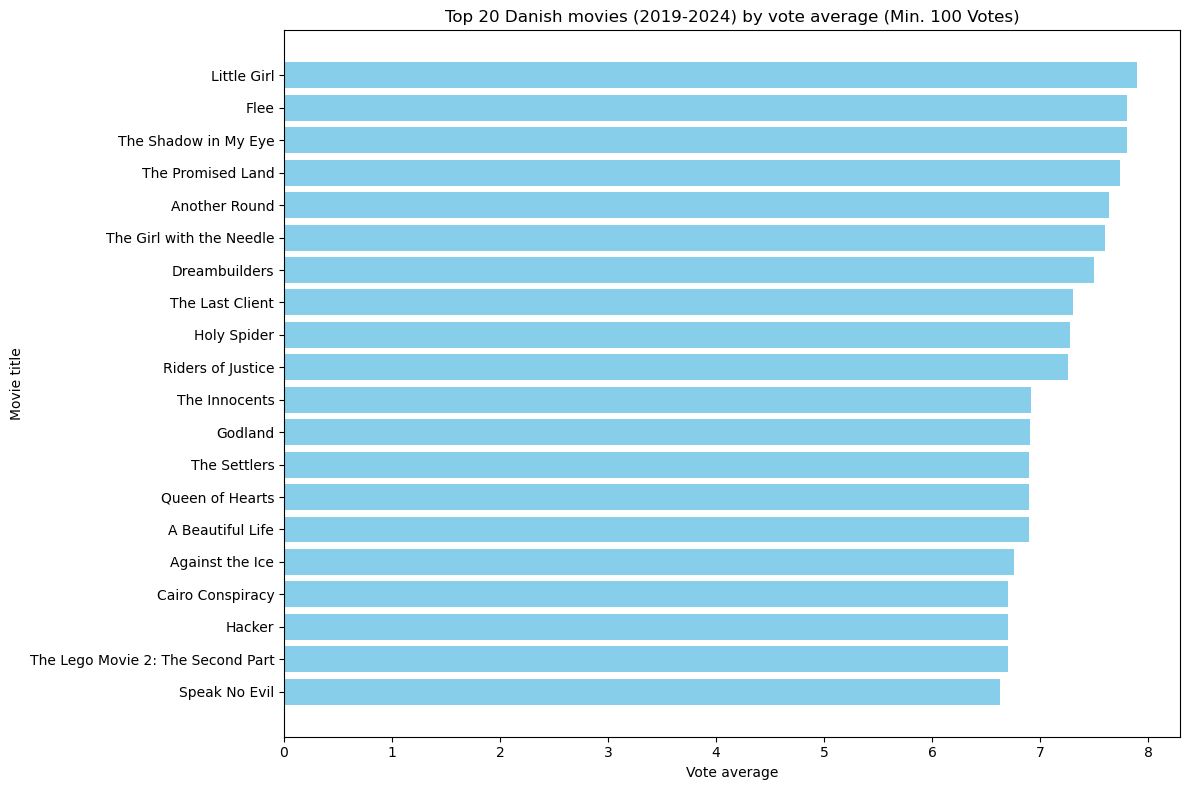

In [34]:
visualize_top_movies(df, 20)